Accuracy: 0.5
Confusion Matrix:
 [[0 1]
 [0 1]]


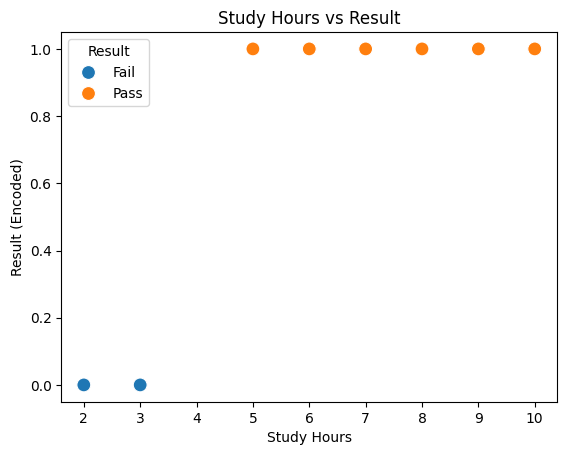

Prediction for Study Hours=4: Pass


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset
data = {
    'Study Hours': [2, 3, 5, 6, 7, 8, 9, 10],
    'Result': ['Fail', 'Fail', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass', 'Pass']
}

df = pd.DataFrame(data)

# Encode target
df['Result_enc'] = df['Result'].map({'Fail': 0, 'Pass': 1})

X = df[['Study Hours']].values
y = df['Result_enc'].values

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict
y_pred = gnb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Visualization
sns.scatterplot(x=df['Study Hours'], y=df['Result_enc'], hue=df['Result'], s=100)
plt.xlabel('Study Hours')
plt.ylabel('Result (Encoded)')
plt.title('Study Hours vs Result')
plt.show()

# Predict new sample
sample_hours = [[4]]
pred = gnb.predict(sample_hours)[0]
label_map = {0: 'Fail', 1: 'Pass'}
print(f"Prediction for Study Hours=4: {label_map[pred]}")
